In [61]:
# Import Dependencies
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import seaborn as sb
import numpy as np

In [62]:
df = pd.read_csv("C:/DataAnalytics/Projectdata/GDP_per_capita.csv")
df1=df[["Country Name","Country Code","2005","2006","2007","2008","2009"]]
df1.dropna(how='any',inplace=True)
df1['avg'] =df1[["2005","2006","2007","2008","2009"]].mean(axis=1)
df1

,Country Name,Country Code,2005,2006,2007,2008,2009,avg
0,Aruba,ABW,23302.831990,24014.944270,25921.026050,27546.899390,24631.434860,25083.427312
1,Afghanistan,AFG,250.294130,272.563077,369.835796,373.361116,445.893298,342.389483
2,Angola,AGO,1443.991924,2062.415212,2878.837305,3868.579014,3347.844900,2720.333671
3,Albania,ALB,2709.142931,3005.012903,3603.013685,4370.539647,4114.136545,3560.369142
4,Andorra,AND,41282.020120,43748.772160,48582.808460,47785.659090,43339.379870,44947.727940
5,Arab World,ARB,3745.790931,4336.718583,4937.598216,6115.243747,5158.250506,4858.720397
6,United Arab Emirates,ARE,39439.801970,42372.221660,42672.613230,45758.905540,33072.575170,40663.223514
7,Argentina,ARG,5076.883829,5878.761027,7193.617640,8953.359275,8161.306966,7052.785747
8,Armenia,ARM,1643.758543,2158.002909,3138.808703,4010.026997,2993.832531,2788.885937
9,American Samoa,ASM,8508.406915,8456.947997,8980.536414,9871.997194,12058.263820,9575.230468


In [78]:
q1 = np.percentile(df1["avg"], 25)
#q3 = np.percentile(arr,75)
q2 =np.percentile(df1["avg"],50)
q3=np.percentile(df1["avg"],75)
#q3
q4=np.percentile(df1["avg"],100)
print(q1,q2,q3,q4)

1377.29455626 4601.047829000001 16289.908727999999 155489.61648


In [79]:
# Create the bins in which Data will be held

bins = [0,round(q1,2), round(q2,2),round(q3,2),round(q4,2)]

# Create the names for the four bins
group_names = ["Very low","Low", "Middle","High"]

In [80]:
df1["Growthlevel"] = pd.cut(df1["avg"], bins, labels=group_names)
#df1.to_csv('C:/DataAnalytics/test.csv')

In [81]:
stats_data = pd.read_csv("C:/DataAnalytics/projectdata/share-of-adults-defined-as-obese.csv")
stats_data_filtered=stats_data[stats_data["Year"].isin (["2005","2006","2007","2008","2009"])]
stats_data_filtered_grp=stats_data_filtered.groupby(["Code"]).mean().reset_index()
#stats_data_filtered_grp
stats_data_filtered_grp.drop(["Year"],axis=1,inplace=True)
stats_data_filtered_final=stats_data_filtered_grp.rename(columns={'Code':'Country Code'})
stats_data_filtered_final

,Country Code,Percentage
0,AFG,3.40
1,AGO,5.32
2,ALB,16.50
3,AND,23.80
4,ARE,25.70
5,ARG,23.90
6,ARM,16.38
7,ATG,15.12
8,AUS,24.02
9,AUT,16.52


In [82]:
merged_df=pd.merge(df1,stats_data_filtered_final, how='inner',on=["Country Code"])
merged_df

,Country Name,Country Code,2005,2006,2007,2008,2009,avg,Growthlevel,Percentage
0,Afghanistan,AFG,250.294130,272.563077,369.835796,373.361116,445.893298,342.389483,Very low,3.40
1,Angola,AGO,1443.991924,2062.415212,2878.837305,3868.579014,3347.844900,2720.333671,Low,5.32
2,Albania,ALB,2709.142931,3005.012903,3603.013685,4370.539647,4114.136545,3560.369142,Low,16.50
3,Andorra,AND,41282.020120,43748.772160,48582.808460,47785.659090,43339.379870,44947.727940,High,23.80
4,United Arab Emirates,ARE,39439.801970,42372.221660,42672.613230,45758.905540,33072.575170,40663.223514,High,25.70
5,Argentina,ARG,5076.883829,5878.761027,7193.617640,8953.359275,8161.306966,7052.785747,Middle,23.90
6,Armenia,ARM,1643.758543,2158.002909,3138.808703,4010.026997,2993.832531,2788.885937,Low,16.38
7,Antigua and Barbuda,ATG,11452.738800,12812.764470,14350.919050,14797.368420,13082.281660,13299.214480,Middle,15.12
8,Australia,AUS,33961.681800,36019.203050,40905.470890,49535.257870,42709.803300,40626.283382,High,24.02
9,Austria,AUT,38403.133880,40635.281820,46855.771750,51708.765750,47963.179400,45113.226520,High,16.52


In [83]:
merged_df_final=merged_df[["Country Code","Percentage","Growthlevel"]].copy()
merged_df_final


,Country Code,Percentage,Growthlevel
0,AFG,3.40,Very low
1,AGO,5.32,Low
2,ALB,16.50,Low
3,AND,23.80,High
4,ARE,25.70,High
5,ARG,23.90,Middle
6,ARM,16.38,Low
7,ATG,15.12,Middle
8,AUS,24.02,High
9,AUT,16.52,High


In [84]:


high_gdp= merged_df_final[merged_df_final["Growthlevel"] == "High"]["Percentage"]
middle_gdp = merged_df_final[merged_df_final["Growthlevel"] == "Middle"]["Percentage"]
low_gdp = merged_df_final[merged_df_final["Growthlevel"] == "Low"]["Percentage"]

Very_low_gdp = merged_df_final[merged_df_final["Growthlevel"] == "Very low"]["Percentage"]



In [85]:
import scipy.stats as stats
stats.f_oneway(Very_low_gdp,low_gdp,middle_gdp,high_gdp)

F_onewayResult(statistic=28.38465762582114, pvalue=4.460516291841734e-15)

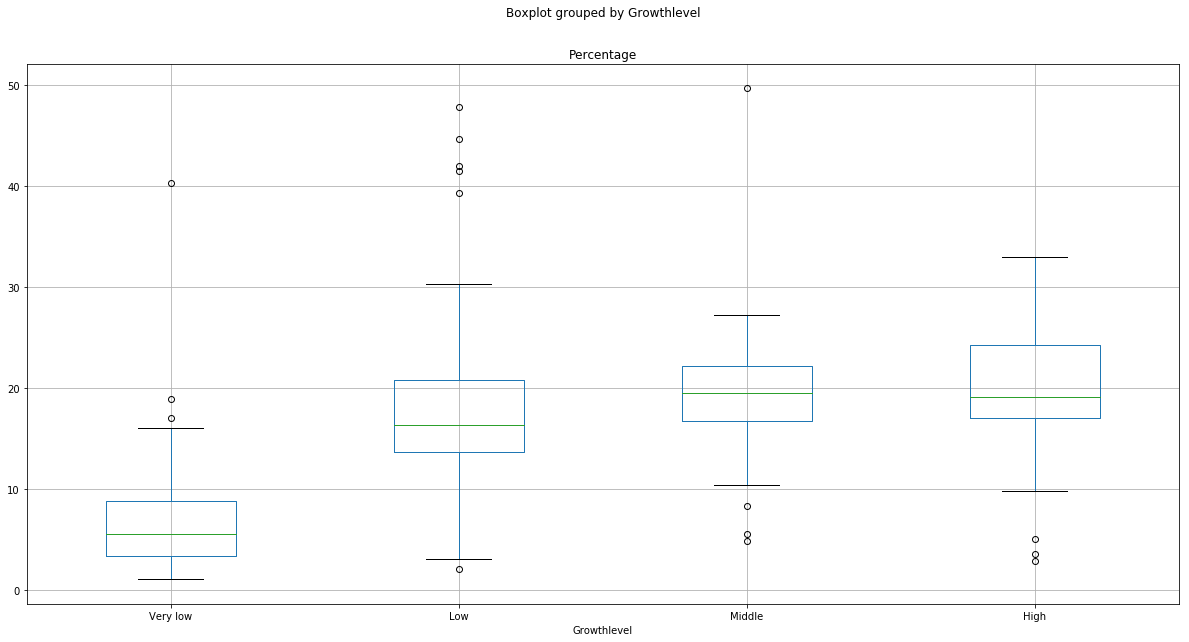

In [86]:
merged_df_final.boxplot("Percentage", by="Growthlevel", figsize=(20, 10))